In [1]:
from keras.datasets import mnist

In [2]:
import numpy as np

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
import matplotlib.pyplot as plt

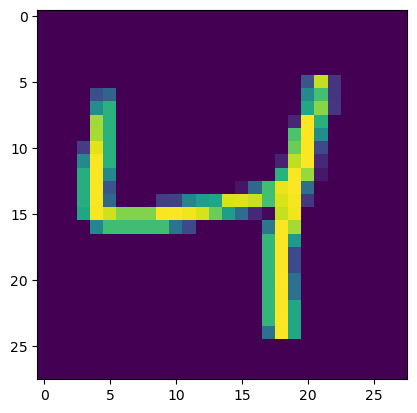

In [7]:
plt.imshow(x_train[2,:,:])

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
sc=StandardScaler()
x_train_sc=sc.fit_transform(x_train.reshape((60000,784)))
x_test_sc=sc.transform(x_test.reshape((10000,784)))

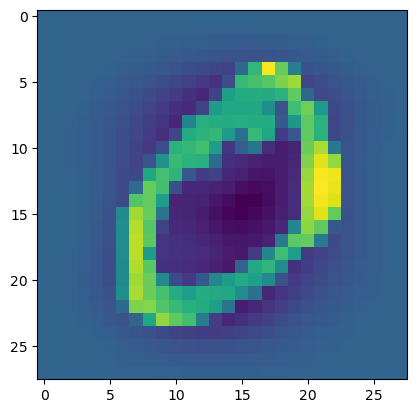

In [24]:
plt.imshow(x_train_sc[1,:].reshape(28,28))

In [11]:
x_train_sc.shape

(60000, 784)

In [12]:
cov=np.matmul(x_train_sc.T,x_train_sc)

In [13]:
cov

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
eival,eivec=np.linalg.eig(cov)

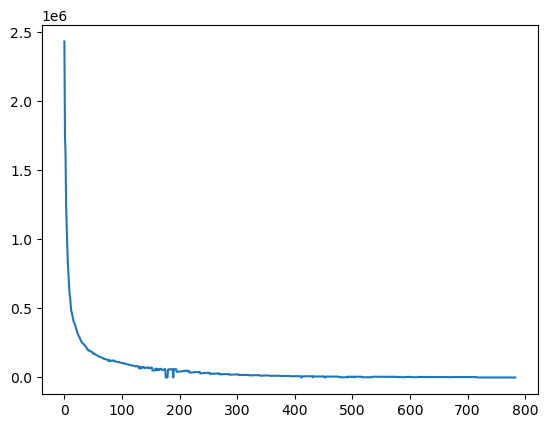

In [15]:
plt.plot(eival)

In [16]:
req=eivec[:,:30]

In [17]:
req.shape

(784, 30)

In [18]:
eignf = np.apply_along_axis(lambda x:np.dot(req.T,x),1,x_train_sc)

In [19]:
eignf.shape

(60000, 30)

In [20]:
eignf_test=np.apply_along_axis(lambda x:np.dot(req.T,x),1,x_test_sc)

In [21]:
from sklearn.svm import SVC

In [22]:
clf=SVC()

In [23]:
clf.fit(eignf,y_train)
y_pred=clf.predict(eignf_test)

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import classification_report,accuracy_score
print(accuracy_score(y_test,y_pred))

0.9674
